In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [2]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [3]:
def surface_pourbaix_bar(cl_at0V,oh_at0V,o_at0V,ooh_at0V,name):
#  name=name.translate(subscript)
  fig, axs = plt.subplots(2, figsize= (6,5), gridspec_kw={'hspace': 0, 'height_ratios': [30, 1]}) # height_ratios : bar 비율
  fig.suptitle(name, size = 18)


  #plt.title(name,fontsize=16)
  cl=cl_at0V
  oh=oh_at0V
  o=o_at0V
  ooh = ooh_at0V   
  #plt.rcParams["figure.figsize"] = (7,7)

  # create data
  V = np.arange(0,3,0.01)
  G_plane = [0] * len(V)
  G_Cl = -V+cl
  G_oh = -V+oh
  G_o = -2*V+o
  G_ooh = -3*V+ooh
  G = np.array([G_plane,G_Cl,G_oh,G_o,G_ooh])

# G_OH > 0 인 경우, OH 생성 x
  G_min = []
  for i in range(len(G_plane)) :
    tem = [G_plane[i],G_Cl[i],G_oh[i],G_o[i],G_ooh[i]]
    if G_oh[i] > 0 :
        tem[3] = 1
        tem[4] = 1
    if G_o[i] > 0 :
        tem[4] = 1
    min_val = np.min(tem)
    G_min.append(min_val)

  fi = ['x']*300

  for i in range(len(G_min)) :
    if G_min[i] == G_oh[i] :
      fi[i] = 'orange'
    if G_min[i] == G_o[i] :
      fi[i] = 'green'
    if G_min[i] == G_ooh[i] :
      fi[i] = 'red'
    if G_min[i] == G_plane[i] :
      fi[i] = 'black'    
    if G_min[i] == G_Cl[i] :
      fi[i] = 'blue'    
  # U = 1.23V 일 때 
  for i in range(len(G)):
    if G_min[123] == G[i][123] :
      if i == 0 :
        U123 = 'bare'
      if i == 1 :
        U123 = 'Cl'  
      if i == 2 :
        U123 = 'OH'  
      if i == 3 :
        U123 = 'O'      
      if i == 4 :
        U123 = 'OOH' 
        
  #print(len(fi))
  x = []
  temp = fi[0]
  for i in range(len(fi)) :
    if temp != fi[i] :
        x.append([i,fi[i-1]])
    temp = fi[i]
    
  x.append([len(fi),fi[-1]])
       # plot lines
  axs[0].plot(V,G_plane, label = "*",c='black')
  axs[0].plot(V,G_Cl, label = "Cl", c='blue')
  axs[0].plot(V,G_oh, label = "OH", c='orange')
  axs[0].plot(V, G_o, label = "O", c='green')
  axs[0].plot(V, G_ooh, label = "OOH", c='red')
  axs[0].axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray')
  axs[0].axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray')

  temp2 = 0
  bh = []
  for i in x :
    bh.append((i[0]-temp2)/100)
    temp2 = i[0]


  #print(x)
  for i in range(len(bh)) :
    axs[1].barh(0,bh[i],left = np.sum(bh[:i]),color = x[i][1],  alpha=.5)

  text_position = (np.min(G_min) + np.max(G_min)) / 2
  th1 = axs[0].text(1.13, text_position, 'OER=1.23V', fontsize=16,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')
  th1 = axs[0].text(1.56, text_position, 'ClER=1.36V', fontsize=16,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')

  axs[0].get_xaxis().set_visible(False)
  axs[1].get_yaxis().set_visible(False)
  axs[0].margins(x=0, y=0)
  axs[1].margins(x=0,y=0)
  axs[0].set_ylabel("ΔG(eV)", fontsize=16)
  axs[1].set_xlabel("Applied potentials (V VS. RHE)", fontsize=16)
  axs[0].legend( ncol=3, fontsize=14, frameon=True, shadow=True, loc='upper right')
  axs[1].yaxis.set_visible(False)

  
  return U123
  
  #plt.show()

In [4]:
df = pd.read_excel('test2.xlsx')
p5n4 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n3 = df.loc[ (df['#of N'] == 3) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n2 = df.loc[ (df['#of N'] == 2) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n1 = df.loc[ (df['#of N'] == 1) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n0 = df.loc[ (df['#of N'] == 0) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n2t = df.loc[ (df['#of N'] == '2-t') & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]

p5n3

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
180,p5,3,Ru,-0.01,0.55,0.02,2.97,1.37,1.19
181,p5,3,Mn,0.72,1.75,0.75,3.78,0.64,0.80
182,p5,3,Fe,0.77,1.65,0.79,3.73,0.59,0.85
183,p5,3,Co,0.85,2.42,1.09,3.88,0.51,0.23
184,p5,3,Ni,1.61,1.17,2.03,4.76,0.25,2.36
185,p5,3,Cu,0.90,0.62,0.37,4.84,0.46,2.99
186,p5,3,Tc,-0.10,-0.83,-0.28,NaN,1.46,NaN
187,p5,3,Rh,0.59,2.37,0.88,3.72,0.77,0.26
188,p5,3,Pd,1.91,4.57,2.41,4.95,0.55,1.18
189,p5,3,Ag,1.06,1.31,0.55,4.91,0.30,2.37


In [5]:
p5n3=p5n3.drop(185)
p5n3=p5n3.drop(184)
p5n3=p5n3.drop(189)

p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]
for i in p5 :
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)
p5n0

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
234,p5,0,Ru,-0.77,-0.99,-0.77,NaN,2.13,NaN
235,p5,0,Mn,0.46,0.73,0.52,3.57,0.90,1.61
236,p5,0,Fe,0.62,1.13,0.83,3.83,0.74,1.47
237,p5,0,Co,0.72,1.84,0.92,3.83,0.64,0.76
238,p5,0,Ni,1.37,3.15,1.83,4.55,0.01,0.60
239,p5,0,Cu,1.65,4.46,2.27,4.92,0.29,1.04
240,p5,0,Tc,-1.43,-1.87,-1.59,NaN,2.79,NaN
241,p5,0,Rh,0.30,1.25,0.49,3.47,1.06,0.99
242,p5,0,Pd,1.57,3.70,2.08,4.75,0.21,0.85
243,p5,0,Ag,1.93,4.81,2.61,4.98,0.57,1.38


In [6]:
drop_M = ['Tc','Re','Os','Mo',"W",'Ru']
p5_drop = []
for i in p5 :
    for j in drop_M :
        i = i[i['M'] != j]
    p5_drop.append(i)


p5_drop[1]

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
181,p5,3,Mn,0.72,1.75,0.75,3.78,0.64,0.80
182,p5,3,Fe,0.77,1.65,0.79,3.73,0.59,0.85
183,p5,3,Co,0.85,2.42,1.09,3.88,0.51,0.23
187,p5,3,Rh,0.59,2.37,0.88,3.72,0.77,0.26
188,p5,3,Pd,1.91,4.57,2.41,4.95,0.55,1.18
192,p5,3,Ir,0.70,2.08,0.94,3.85,0.66,0.54
193,p5,3,Pt,1.92,4.25,2.37,4.99,0.56,1.14
194,p5,3,Au,2.06,5.32,2.65,4.95,0.70,1.44
195,p5,3,Cr,0.19,0.27,0.08,3.17,1.17,1.67


In [7]:
p5_drop[0].values[5][3]

1.03

[['p5' 4 'Mn' 0.8 1.64 0.89 3.86 0.56 0.9899999999999998]
 ['p5' 4 'Fe' 0.86 1.77 0.97 3.78 0.5 0.7799999999999998]
 ['p5' 4 'Co' 1.15 2.77 1.36 4.09 0.21 0.17999999999999994]
 ['p5' 4 'Ni' 1.83 4.05 2.23 4.81 0.47 1.0]
 ['p5' 4 'Cu' 1.9 4.5 2.33 4.86 0.54 1.1]
 ['p5' 4 'Rh' 1.03 2.78 1.31 4.1 0.33 0.23999999999999977]
 ['p5' 4 'Pd' 2.07 4.8 2.54 4.95 0.71 1.31]
 ['p5' 4 'Ag' 2.06 4.97 2.71 4.92 0.7 1.48]
 ['p5' 4 'Ir' 1.08 2.41 1.34 4.18 0.28 0.5399999999999996]
 ['p5' 4 'Pt' 2.03 4.36 2.51 4.98 0.67 1.2799999999999998]
 ['p5' 4 'Au' 2.2 5.68 2.75 4.96 0.84 1.6999999999999997]
 ['p5' 4 'Cr' 0.4 0.72 0.32 3.34 0.96 1.3900000000000001]]
0.8 1.64 0.89 3.86 pyrollic MnN$_4$C
0.86 1.77 0.97 3.78 pyrollic FeN$_4$C
1.15 2.77 1.36 4.09 pyrollic CoN$_4$C
1.83 4.05 2.23 4.81 pyrollic NiN$_4$C
1.9 4.5 2.33 4.86 pyrollic CuN$_4$C
1.03 2.78 1.31 4.1 pyrollic RhN$_4$C
2.07 4.8 2.54 4.95 pyrollic PdN$_4$C
2.06 4.97 2.71 4.92 pyrollic AgN$_4$C
1.08 2.41 1.34 4.18 pyrollic IrN$_4$C
2.03 4.36 2.51 4.98

<ipython-input-3-0c1f8d3d5f76>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, figsize= (6,5), gridspec_kw={'hspace': 0, 'height_ratios': [30, 1]}) # height_ratios : bar 비율


[['p5' 2 'Mn' 0.51 1.51 0.54 3.68 0.85 0.94]
 ['p5' 2 'Fe' 0.77 1.67 0.8 3.86 0.59 0.96]
 ['p5' 2 'Co' 0.73 1.96 0.92 3.77 0.63 0.5800000000000001]
 ['p5' 2 'Ni' 1.31 3.68 1.68 4.54 0.05 0.77]
 ['p5' 2 'Cu' 1.78 4.56 2.29 4.93 0.42 1.06]
 ['p5' 2 'Rh' 0.47 2.08 0.76 3.59 0.89 0.2799999999999998]
 ['p5' 2 'Pd' 1.52 4.05 1.97 4.78 0.16 0.8500000000000001]
 ['p5' 2 'Ag' 2.03 4.85 2.62 4.96 0.67 1.3900000000000001]
 ['p5' 2 'Ir' 0.49 1.75 0.73 3.61 0.87 0.6299999999999999]
 ['p5' 2 'Pt' 1.55 3.83 1.95 4.83 0.19 0.72]
 ['p5' 2 'Au' 2.16 5.08 2.71 4.99 0.8 1.48]
 ['p5' 2 'Cr' 0.01 -0.28 -0.19 2.89 1.35 1.94]]
0.51 1.51 0.54 3.68 pyrollic MnN$_2$C
0.77 1.67 0.8 3.86 pyrollic FeN$_2$C
0.73 1.96 0.92 3.77 pyrollic CoN$_2$C
1.31 3.68 1.68 4.54 pyrollic NiN$_2$C
1.78 4.56 2.29 4.93 pyrollic CuN$_2$C
0.47 2.08 0.76 3.59 pyrollic RhN$_2$C
1.52 4.05 1.97 4.78 pyrollic PdN$_2$C
2.03 4.85 2.62 4.96 pyrollic AgN$_2$C
0.49 1.75 0.73 3.61 pyrollic IrN$_2$C
1.55 3.83 1.95 4.83 pyrollic PtN$_2$C
2.16 5.08 

TypeError: %d format: a number is required, not str

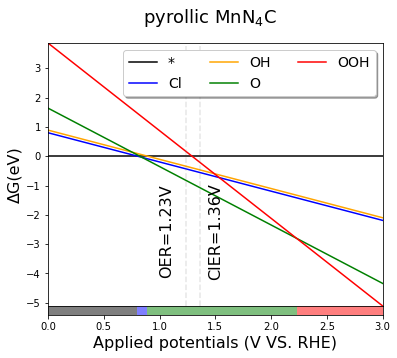

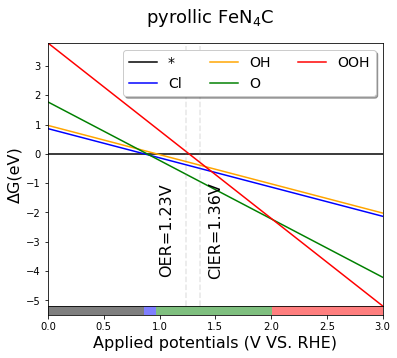

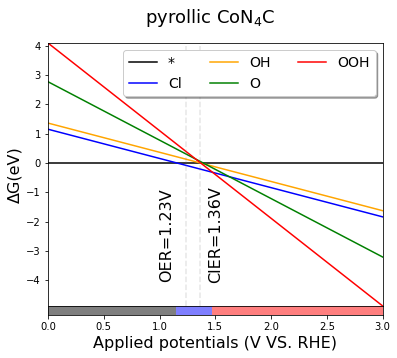

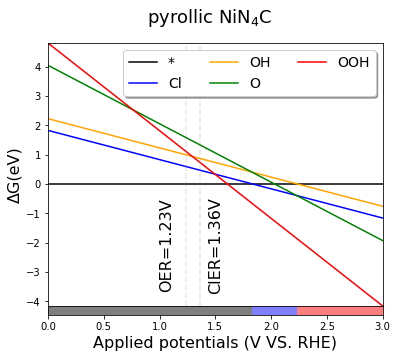

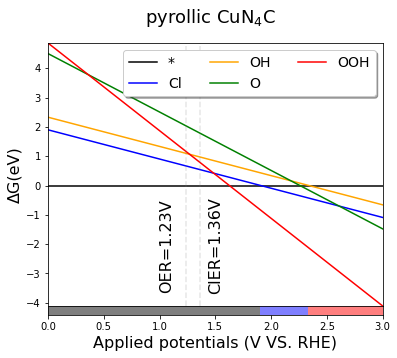

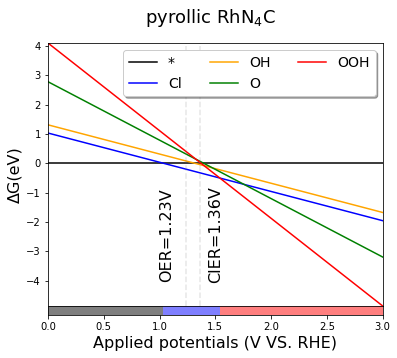

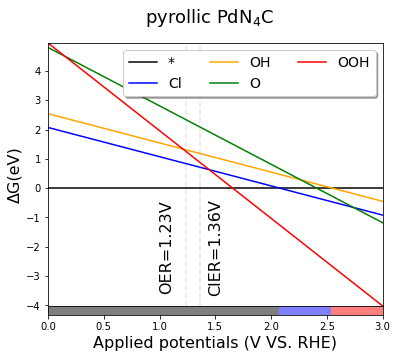

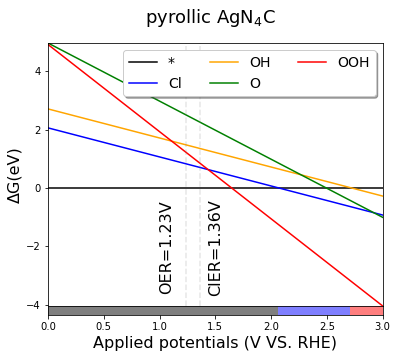

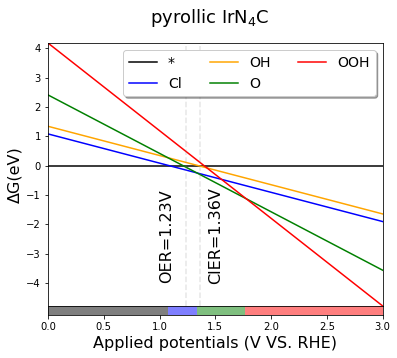

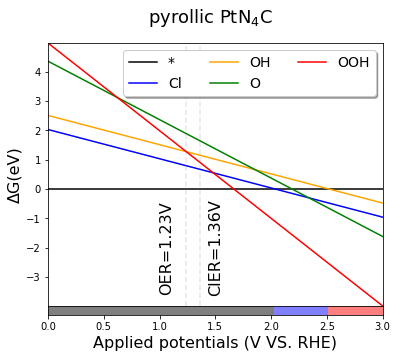

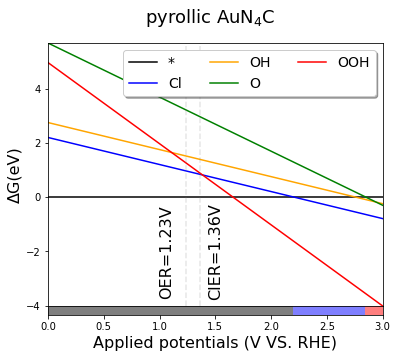

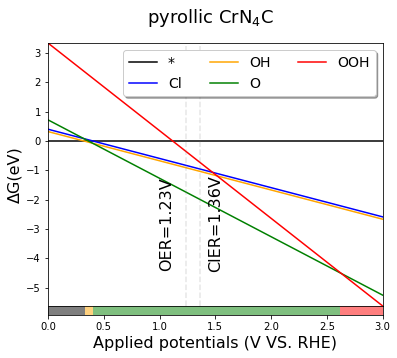

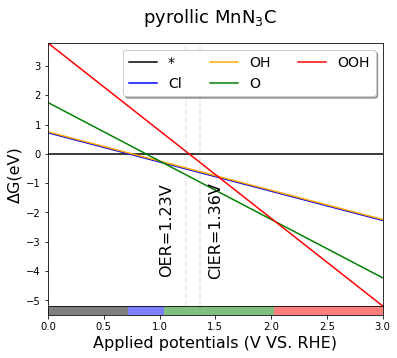

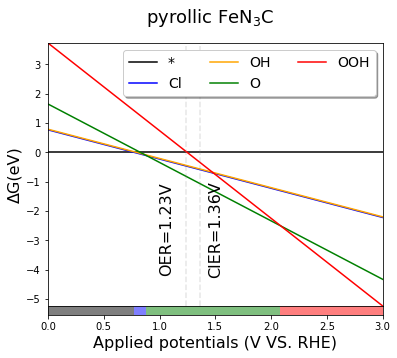

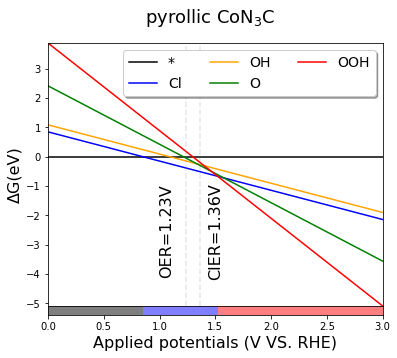

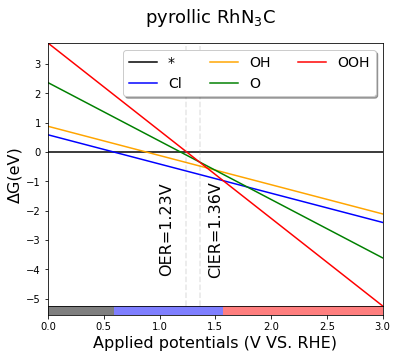

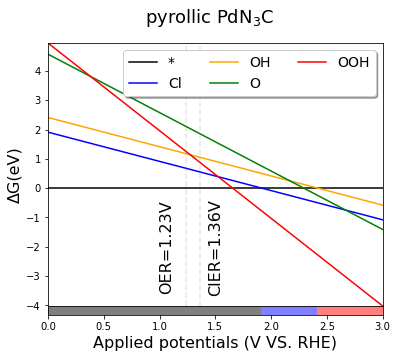

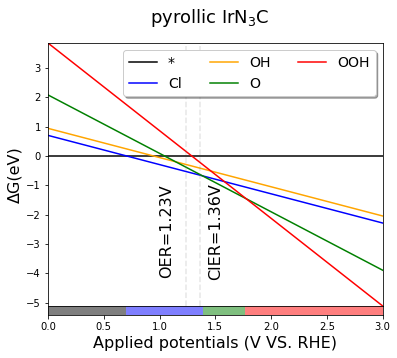

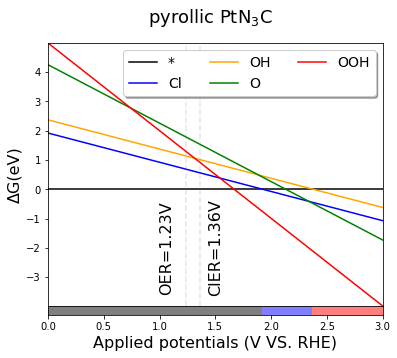

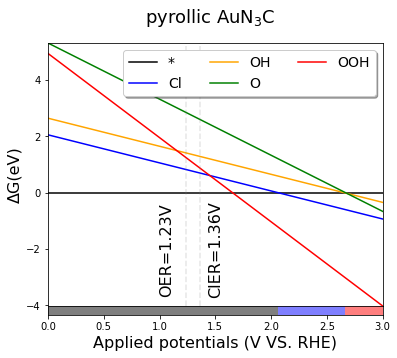

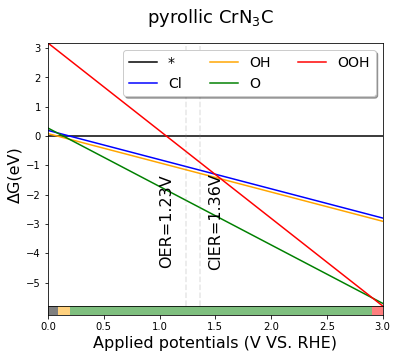

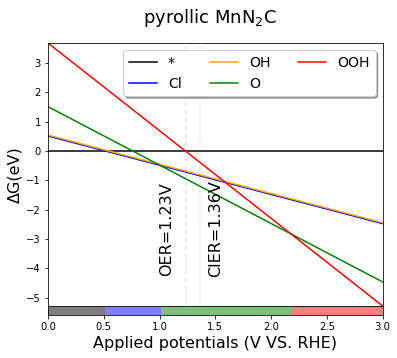

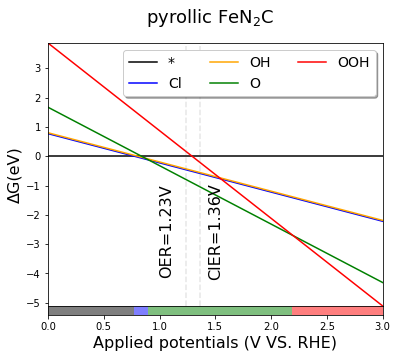

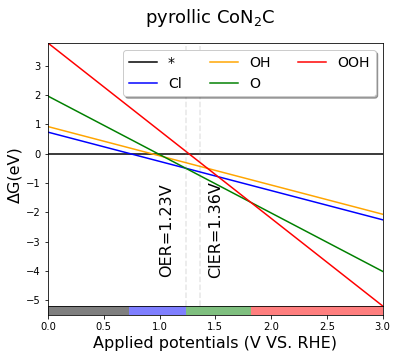

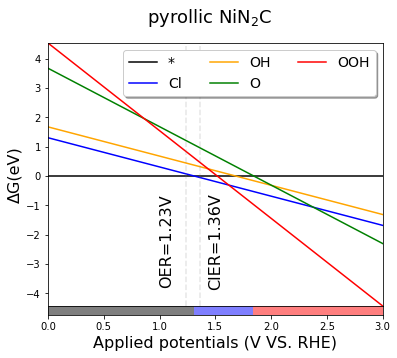

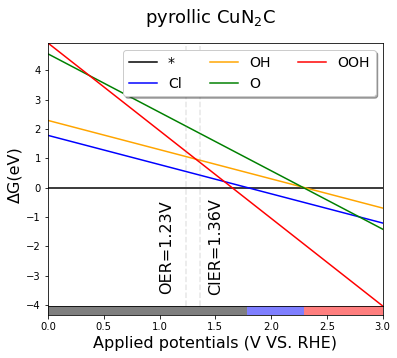

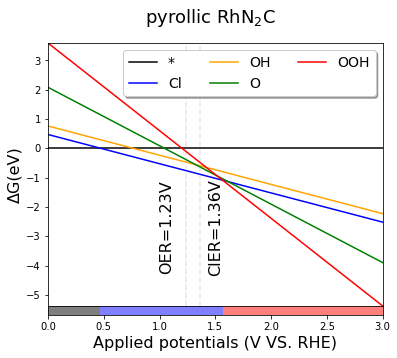

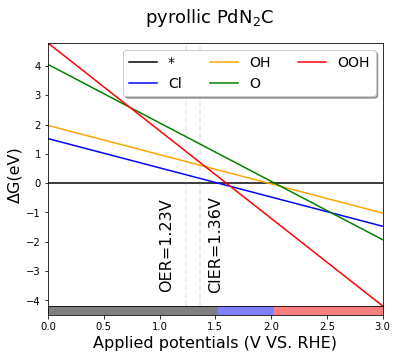

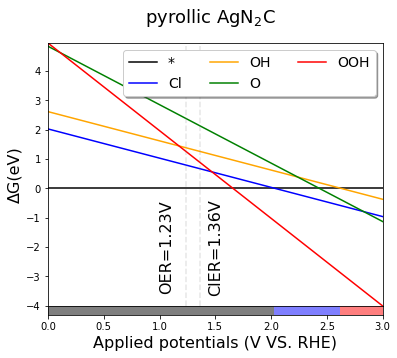

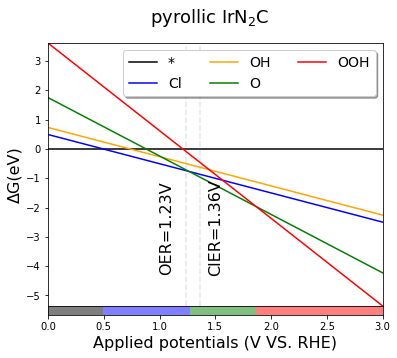

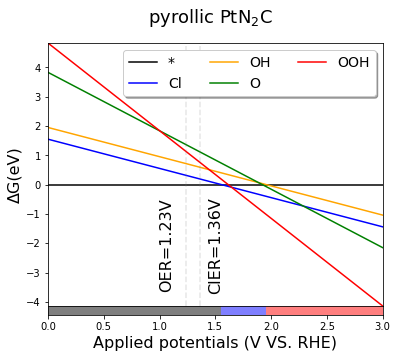

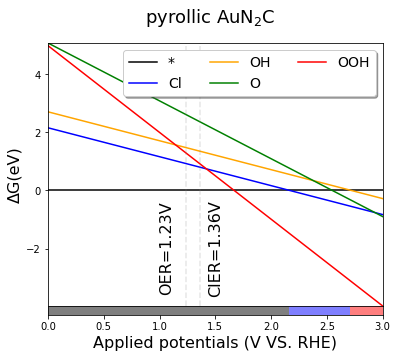

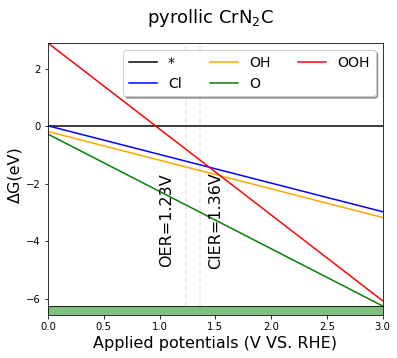

In [8]:
for i in p5_drop :
    print(i.values)
    for j in i.values :
        Gcl = j[3]
        Go = j[4]
        Goh = j[5]
        Gooh = j[6]
        name = 'pyrollic %sN$_%d$C' %(j[2],j[1])
        print(Gcl, Go, Goh, Gooh, name)
        
        surface_pourbaix_bar(Gcl,Goh,Go,Gooh,name)

[ 1.64  1.77  2.77  4.05  4.5   2.78  4.8   4.97  2.41  4.36  5.68  0.72
  1.75  1.65  2.42  2.37  4.57  2.08  4.25  5.32  0.27  1.51  1.67  1.96
  3.68  4.56  2.08  4.05  4.85  1.75  3.83  5.08 -0.28  1.27  1.3   1.97
  3.58  4.27  2.01  4.04  4.69  1.55  3.75  4.82 -0.32  1.1   1.39  1.82
  3.35  4.31  1.68  3.85  4.71  1.2   3.58  4.75 -0.63  0.73  1.13  1.84
  3.15  4.46  1.25  3.7   4.81  0.49  3.43  4.96 -0.97]
LinregressResult(slope=0.5502530948717456, intercept=-0.12693216622914538, rvalue=0.9904634348018155, pvalue=2.0697567238006055e-59, stderr=0.009351036203682536, intercept_stderr=0.03037124187111874)


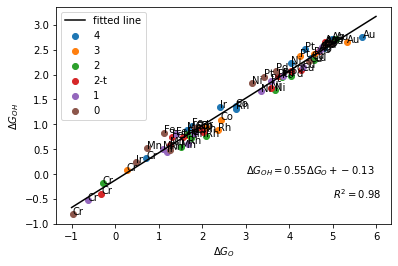

In [9]:
x_n, y_n = np.array([]), np.array([])
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_OH']),label=list(i['#of N'])[0]) 
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_OH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))

print(x_n)


plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OH}$')

res = stats.linregress(x_n, y_n)
print(res)
x_fit = np.arange(-1,6,0.01)
y_fit = res.intercept + res.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{OH} = %.2f ΔG_O + %.2f $' %(res.slope, res.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %res.rvalue**2)
plt.legend()

Text(0, 0.5, '$ΔG_{OOH}$')

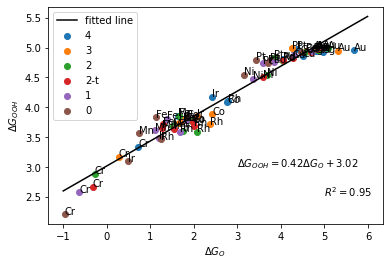

In [10]:
x_n = []
y_n = []
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_OOH']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_OOH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))

    
res2 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,6,0.01)
y_fit = res2.intercept + res2.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,3 ,'$ΔG_{OOH} = %.2f ΔG_O + %.2f $' %(res2.slope, res2.intercept))
plt.text( 5,2.5 ,'$R^2 = %.2f$' %res2.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OOH}$')

Text(0, 0.5, '$ΔG_{OOH}$')

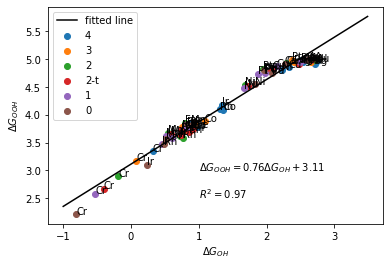

In [11]:
x_n = []
y_n = []
for i in p5_drop :
    plt.scatter(list(i['G_OH']),list(i['G_OOH']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_OH']))
    y_n = np.append(y_n,np.array(i['G_OOH']))
    for j in range(len(i)) :
        plt.text(list(i['G_OH'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))

    
res3 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,3.5,0.01)
y_fit = res3.intercept + res3.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 1,3 ,'$ΔG_{OOH} = %.2f ΔG_{OH} + %.2f $' %(res3.slope, res3.intercept))
plt.text( 1,2.5 ,'$R^2 = %.2f$' %res3.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_{OH}$')
plt.ylabel('$ΔG_{OOH}$')

In [ ]:
def func2(x, b):
    return x + b

popt, pcov = curve_fit(func2, x_n, y_n)
plt.scatter(x_n,y_n)
plt.plot(x_n, func2(x_n, *popt), color='red', linewidth=1)
plt.ylabel('ΔGₒₒₕ')
plt.xlabel(' ΔGₒₕ ')
plt.text(0.5,3,'ΔGₒₒₕ = ΔGₒₕ + %.2f' %(popt[0]) ) 

In [ ]:
x_n = []
y_n = []
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_Cl']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_Cl']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_Cl'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))
res4 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,3.5,0.01)
y_fit = res4.intercept + res4.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,.5 ,'$ΔG_{Cl} = %.2f ΔG_{OH} + %.2f $' %(res4.slope, res4.intercept))
plt.text( 3,0 ,'$R^2 = %.2f$' %res4.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_{O}$')
plt.ylabel('$ΔG_{Cl}$')

In [ ]:
x = []
y = []
for i in p5_drop :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['Over_OER']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j],list(i['Over_OER'])[j],list(i['M'])[j])    
        
#x_OER_fit = np.arange(-.2,3,0.01)
#y_OER_fit1 = (2.78 - x_OER_fit-1.23)
#y_OER_fit2 = x_OER_fit-1.23

#η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
#plt.plot(x_OER_fit , η_OER_fit,c='black',alpha =0.3)

plt.legend()

plt.xlabel('$ΔG_2$')
plt.ylabel('$η_{OER}$')

In [ ]:
x = []
y = []
for i in p5_drop :
    plt.scatter(np.array(list(i['G_Cl'])),list(i['OVER_Cl']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_Cl'])[j],list(i['OVER_Cl'])[j],list(i['M'])[j])    
                
plt.legend()

plt.xlabel('$ΔG_{Cl}$')
plt.ylabel('$η_{CER}$')

# Solvation 고려

In [12]:
p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]

for i in p5 :
    i['G_OOH'] = i['G_OOH'] - 0.3
    i['G_OH'] = i['G_OH'] - 0.3
    
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)



In [13]:
drop_M = ['Tc','Re','Os','Mo',"W",'Ru']
p5_drop = []
for i in p5 :
    for j in drop_M :
        i = i[i['M'] != j]
    p5_drop.append(i)
        
p5_drop[0]

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
163,p5,4,Mn,0.80,1.64,0.59,3.56,0.56,0.69
164,p5,4,Fe,0.86,1.77,0.67,3.48,0.50,0.48
165,p5,4,Co,1.15,2.77,1.06,3.79,0.21,0.48
166,p5,4,Ni,1.83,4.05,1.93,4.51,0.47,0.89
167,p5,4,Cu,1.90,4.50,2.03,4.56,0.54,1.24
169,p5,4,Rh,1.03,2.78,1.01,3.80,0.33,0.54
170,p5,4,Pd,2.07,4.80,2.24,4.65,0.71,1.33
171,p5,4,Ag,2.06,4.97,2.41,4.62,0.70,1.33
174,p5,4,Ir,1.08,2.41,1.04,3.88,0.28,0.24
175,p5,4,Pt,2.03,4.36,2.21,4.68,0.67,0.98


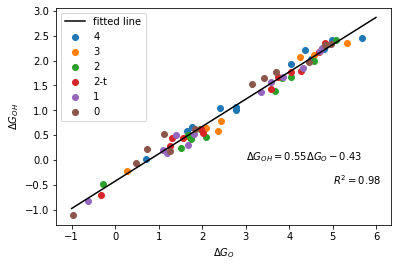

In [14]:
solv_G_O, solv_G_OH = np.array([]), np.array([])
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_OH']),label=list(i['#of N'])[0]) 
    solv_G_O = np.append(solv_G_O,np.array(i['G_O']))
    solv_G_OH = np.append(solv_G_OH,np.array(i['G_OH']))
#    for j in range(len(i)) :
#        plt.text(list(i['G_O'])[j],list(i['G_OH'])[j],list(i['M'])[j])

        
        #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OH}$')

solv_res = stats.linregress(solv_G_O, solv_G_OH)
x_fit = np.arange(-1,6,0.01)
y_fit = solv_res.intercept + solv_res.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{OH} = %.2f ΔG_O  %.2f $' %(solv_res.slope, solv_res.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %solv_res.rvalue**2)
plt.legend()

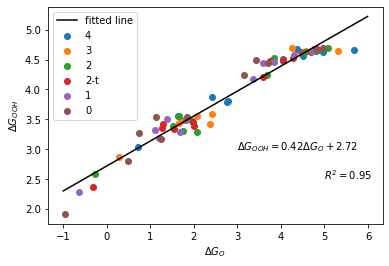

In [15]:
solv_G_OOH = np.array([])
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_OOH']),label=list(i['#of N'])[0]) 
    solv_G_OOH = np.append(solv_G_OOH,np.array(i['G_OOH']))
#    for j in range(len(i)) :
#        plt.text(list(i['G_O'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OOH}$')

solv_res2 = stats.linregress(solv_G_O, solv_G_OOH)

x_fit = np.arange(-1,6,0.01)
y_fit = solv_res2.intercept + solv_res2.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,3 ,'$ΔG_{OOH} = %.2f ΔG_O + %.2f $' %(solv_res2.slope, solv_res2.intercept))
plt.text( 5,2.5 ,'$R^2 = %.2f$' %solv_res2.rvalue**2)
plt.legend()

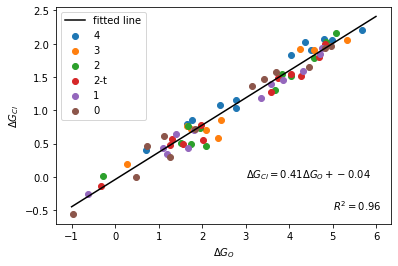

In [16]:
solv_G_Cl = np.array([])
for i in p5_drop :
    plt.scatter(list(i['G_O']),list(i['G_Cl']),label=list(i['#of N'])[0]) 
    solv_G_Cl = np.append(solv_G_Cl,np.array(i['G_Cl']))
#    for j in range(len(i)) :
#        plt.text(list(i['G_O'])[j],list(i['G_Cl'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{Cl}$')

solv_res3 = stats.linregress(solv_G_O, solv_G_Cl)

x_fit = np.arange(-1,6,0.01)
y_fit = solv_res3.intercept + solv_res3.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{Cl} = %.2f ΔG_O + %.2f $' %(solv_res3.slope, solv_res3.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %solv_res3.rvalue**2)
plt.legend()

Text(0.5, 3, 'ΔGₒₒₕ = ΔGₒₕ + 2.78')

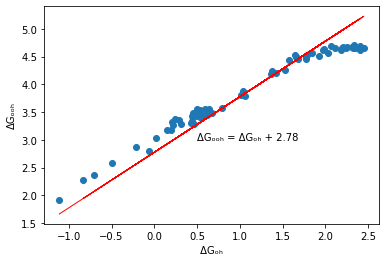

In [17]:
def func2(x, b):
    return x + b

popt, pcov = curve_fit(func2, solv_G_OH, solv_G_OOH)
plt.scatter(solv_G_OH, solv_G_OOH)
plt.plot(solv_G_OH, func2(solv_G_OH, *popt), color='red', linewidth=1)
plt.ylabel('ΔGₒₒₕ')
plt.xlabel(' ΔGₒₕ ')
plt.text(0.5,3,'ΔGₒₒₕ = ΔGₒₕ + %.2f' %(popt[0]) ) 

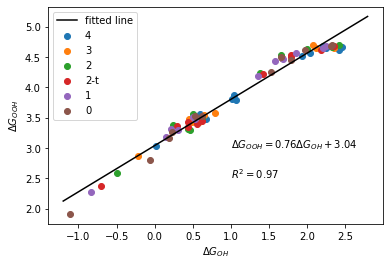

In [18]:
for i in p5_drop :
    plt.scatter(list(i['G_OH']),list(i['G_OOH']),label=list(i['#of N'])[0]) 
#    for j in range(len(i)) :
#        plt.text(list(i['G_OH'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_{OH}$')
plt.ylabel('$ΔG_{OOH}$')

solv_res4 = stats.linregress(solv_G_OH, solv_G_OOH)

x_fit = np.arange(-1.2,2.8,0.01)
y_fit = solv_res4.intercept + solv_res4.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 1,3 ,'$ΔG_{OOH} = %.2f ΔG_{OH} + %.2f $' %(solv_res4.slope, solv_res4.intercept))
plt.text( 1,2.5 ,'$R^2 = %.2f$' %solv_res4.rvalue**2)
plt.legend()

Text(0, 0.5, '$η_{OER}$')

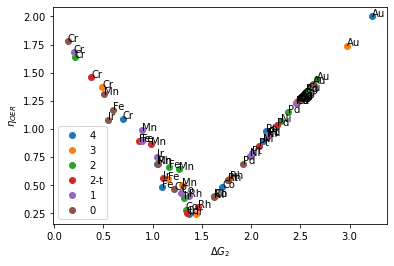

In [19]:
for i in p5_drop :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['Over_OER']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j],list(i['Over_OER'])[j],list(i['M'])[j])    
        
#x_OER_fit = np.arange(-.2,3,0.01)
#y_OER_fit1 = (2.78 - x_OER_fit-1.23)
#y_OER_fit2 = x_OER_fit-1.23

#η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
#plt.plot(x_OER_fit , η_OER_fit,c='black',alpha =0.3)

plt.legend()

plt.xlabel('$ΔG_2$')
plt.ylabel('$η_{OER}$')

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

#plt.style.use("cyberpunk")

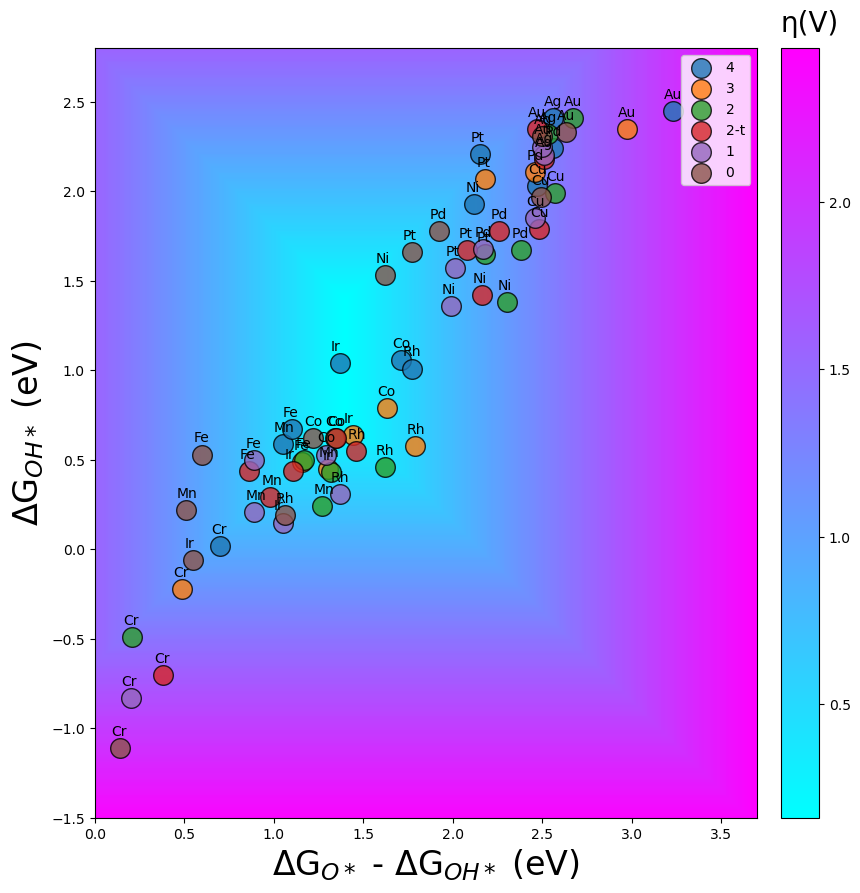

In [20]:
#mplcyberpunk.add_glow_effects()
plt.style.use('default')
x = np.arange(0,3.7,0.01)
y = np.arange(-1.5,2.8,0.01)

X, Y = np.meshgrid(x , y)

X = np.array(list(X))
Y = np.array(list(reversed(Y)))

Z1 = X-1.23 # 2
Z2 = -X+2.78-1.23 # 3
Z3 = Y - 1.23
Z4 = 1.23*3 - Y - 2.78

Z = np.maximum(Z1,Z2)
Z= np.maximum(Z,Z3)
Z= np.maximum(Z,Z4)

#print(Z1,Z2,Z3,Z4)


fig, ax = plt.subplots(1,1, figsize=(30,10))
#im = ax.imshow(Z, interpolation='none',extent=[0,3.5,-1.5,2.5])

#im = ax.imshow(Z, interpolation='none',extent=[0,3.5,-1.5,2.5],cmap='YlGnBu')
im = ax.imshow(Z, interpolation='none',extent=[0,3.7,-1.5,2.8],cmap='cool')

cb = plt.colorbar(im,ax=ax,fraction=0.25, pad=0.01)
cb.set_label('η(V)',rotation = 0, y = 1.05 , labelpad = -30, size = 20)

for i in p5_drop :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),np.array(list(i['G_OH'])),label=list(i['#of N'])[0], s = 200, alpha = 0.8, edgecolors='black')

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j]-0.05,list(i['G_OH'])[j]+0.07,list(i['M'])[j],c='black') 
plt.legend()    
#mplcyberpunk.make_scatter_glow()
plt.xlabel('ΔG$_{O*}$ - ΔG$_{OH*}$ (eV)',fontsize=24)
plt.ylabel('ΔG$_{OH*}$ (eV)',fontsize=24)
plt.grid(False)

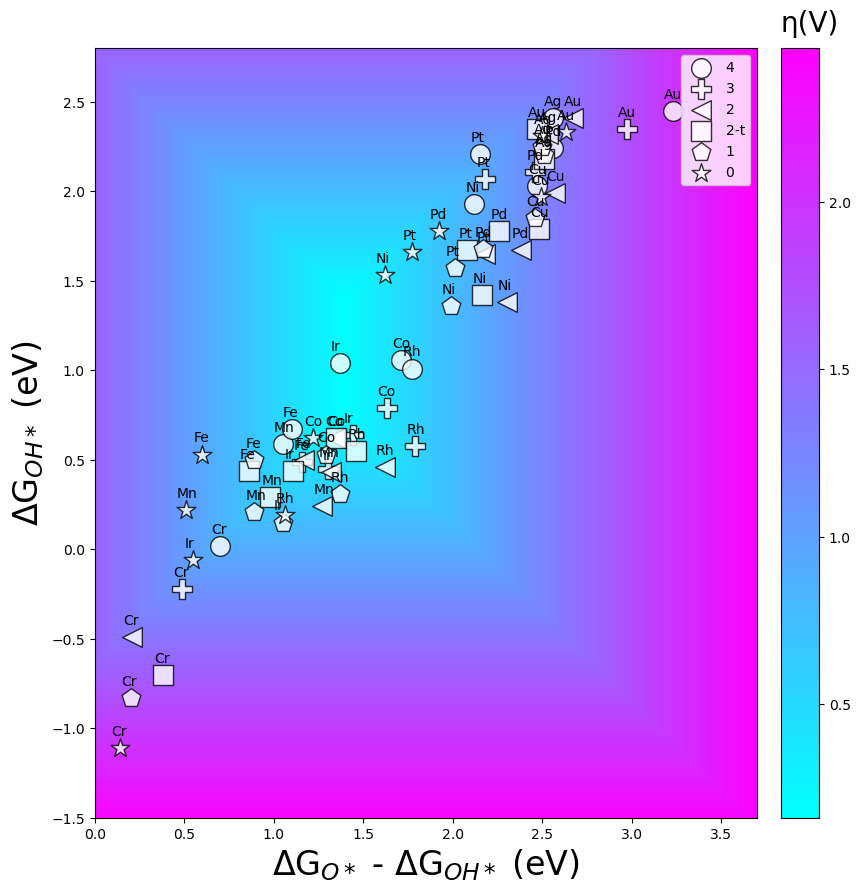

In [21]:
#mplcyberpunk.add_glow_effects()
plt.style.use('default')
x = np.arange(0,3.7,0.01)
y = np.arange(-1.5,2.8,0.01)

X, Y = np.meshgrid(x , y)

X = np.array(list(X))
Y = np.array(list(reversed(Y)))

Z1 = X-1.23 # 2
Z2 = -X+2.78-1.23 # 3
Z3 = Y - 1.23
Z4 = 1.23*3 - Y - 2.78

Z = np.maximum(Z1,Z2)
Z= np.maximum(Z,Z3)
Z= np.maximum(Z,Z4)

#print(Z1,Z2,Z3,Z4)


fig, ax = plt.subplots(1,1, figsize=(30,10))
#im = ax.imshow(Z, interpolation='none',extent=[0,3.5,-1.5,2.5])

#im = ax.imshow(Z, interpolation='none',extent=[0,3.5,-1.5,2.5],cmap='YlGnBu')
im = ax.imshow(Z, interpolation='none',extent=[0,3.7,-1.5,2.8],cmap='cool')

cb = plt.colorbar(im,ax=ax,fraction=0.25, pad=0.01)
cb.set_label('η(V)',rotation = 0, y = 1.05 , labelpad = -30, size = 20)

symbol = ['o','P','<','s','p','*']
sym = 0
for i in p5_drop :  
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),np.array(list(i['G_OH'])),label=list(i['#of N'])[0], s = 200, alpha = 0.8, edgecolors='black',c='white', marker=symbol[sym])
    sym = sym+1

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j]-0.05,list(i['G_OH'])[j]+0.07,list(i['M'])[j],c='black') 
plt.legend()    
#mplcyberpunk.make_scatter_glow()
plt.xlabel('ΔG$_{O*}$ - ΔG$_{OH*}$ (eV)',fontsize=24)
plt.ylabel('ΔG$_{OH*}$ (eV)',fontsize=24)
plt.grid(False)

Text(0, 0.5, '$-η_{CER}$')

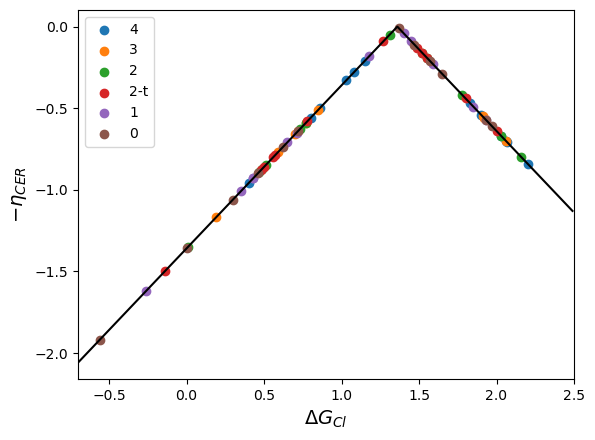

In [22]:
x = []
y = []
x_fit = np.arange(-0.7,2.5,0.01)
y_fit1 = x_fit-1.36
y_fit2 = 1.36-x_fit
y_fit = np.maximum(y_fit1,y_fit2)




for i in p5_drop :
    plt.scatter(np.array(list(i['G_Cl'])),list(-i['OVER_Cl']),label=list(i['#of N'])[0])

    #for j in range(len(i)) :
        #plt.text(list(i['G_Cl'])[j],list(-i['OVER_Cl'])[j]+0.1,list(i['M'])[j])   
plt.plot(x_fit,-y_fit,c='black')                
plt.legend()
plt.xlim(-.7,2.5)

plt.xlabel('$ΔG_{Cl}$',fontsize=14)
plt.ylabel('$-η_{CER}$',fontsize=14)



In [ ]:
def climbvolcano(TM) :
    plt.figure(1)
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0.5,2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black') 
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-t',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    arrowx = list()
    arrowy = list()
    
    arrowx_left = list()
    arrowx_right = list()
    

    
    
    for i in p5_drop :
        
        Gcl = float(i.loc[i['M']== TM, 'G_Cl'])
        η1 = Gcl - 1.36
        η2 = 1.36 - Gcl
        η = np.maximum(η1,η2)
        
        ax.scatter(Gcl,-η,c = c[j],label = l[j],s=40)
        
        j = j+1
        
        arrowx.append(Gcl)
        arrowy.append(-η)
        
    for i in range(len(arrowx)) :
        if arrowx[i] < 1.36 :
            arrowx_left.append(arrowx[i])

        if arrowx[i] >= 1.36 :
            arrowx_right.append(arrowx[i])


    if len(arrowx_left) != 0 :        
        arrowx_left = np.array(sorted(arrowx_left))
        arrowy_left = 1.36-arrowx_left
    
    if len(arrowx_right) != 0 :
        arrowx_right = np.array(sorted(arrowx_right)[::-1])
        #print(arrowx_right)
        arrowy_right = arrowx_right-1.36
                                
                                
    arrowy_min = max(arrowy)
                                
    if len(arrowx_left) != 0 and len(arrowx_right) != 0 :
        arrowx_min = arrowx[arrowy.index(arrowy_min)]
    
        arrowx_left = np.append(arrowx_left,arrowx_min)
        arrowy_left = np.append(arrowy_left,arrowy_min)
    
        arrowx_right = np.append(arrowx_right,arrowx_min)
        arrowy_right = np.append(arrowy_right,arrowy_min)
    
    if len(arrowx_left) != 0 :     
        temp1 = arrowx_left[0]
        temp2 = -arrowy_left[0]
        for i in range(0,len(arrowx_left)) :
            #print(arrowx_left[i], -arrowy_left[i])
            ann = ax.annotate("",
                              xy=(arrowx_left[i], -arrowy_left[i]), xycoords='data',
                              xytext=(temp1, temp2), textcoords='data',
                              size=10, va="center", ha="center",
                              arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            temp1, temp2 = arrowx_left[i], -arrowy_left[i]
            
    if len(arrowx_right) != 0 :     
        temp1 = arrowx_right[0]
        temp2 = -arrowy_right[0]
        for i in range(0,len(arrowx_right)) :
            #print(arrowx_right[i], -arrowy_right[i])
            ann = ax.annotate("",
                              xy=(arrowx_right[i], -arrowy_right[i]), xycoords='data',
                              xytext=(temp1, temp2), textcoords='data',
                              size=10, va="center", ha="center",
                              arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3,rad=+1",fc="w")
                             )
            temp1, temp2 = arrowx_right[i], -arrowy_right[i]
        
        
    ax.legend()
        
    plt.xlabel('ΔG$_{Cl}$',fontsize=14)
    plt.ylabel('-η$_{CER}$',fontsize=14)

    

plt.show()
climbvolcano('Ni')

In [ ]:
climbvolcano('Pd')

In [ ]:
climbvolcano('Pt')

In [ ]:
climbvolcano('Cu')

In [ ]:
climbvolcano('Ag')

In [ ]:
climbvolcano('Au')

In [ ]:
climbvolcano('Co')

In [ ]:
climbvolcano('Rh')

In [ ]:
climbvolcano('Ir')

In [ ]:
climbvolcano('Rh')

In [ ]:
for i in p5 :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['OVER_Cl']),label=list(i['#of N'])[0])


In [ ]:
import matplotlib.cbook as cbook
import matplotlib.cm as cm
x = np.arange(-0.2,3.5,0.01)
y = np.arange(-1.2,3.5,0.01)
X, Y = np.meshgrid(x , y)


Y = np.array(list(reversed(Y)))

Z1 = Y-1.23
Z2 = X-1.23
Z3 = 0.78*Y + 3.01 -1.23
Z4 = 1.23 * 4 - np.array(Z1) - np.array(Z2) - np.array(Z3)
print(Z4+1.23*3)
Z = np.maximum(Z1,Z2,Z3,Z4)


plt.figure(figsize=(12,15))

fig, ax = plt.subplots(1,1)
im = ax.imshow(Z, interpolation='none',extent=[-.2,3.5,-1.2,3.5],cmap='YlOrRd')
cb = plt.colorbar(im,ax=ax,fraction=0.025, pad=0.04)
#cb.set_label('$η_{CER}-η_{OER}$',rotation = 0, y = 1.1 , labelpad = -30)



plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),np.array(list(i['G_OH'])) , marker='.',c='black',s=200)
plt.ylim(-1.2,3.5)
plt.xlabel('$ΔG_2$')
plt.ylabel('$ΔG_{OH}$')

plt.show()
